# 재표본추출 방법

- 훈련셋에서 **반복적으로 표본을 추출**하고 각 표본에 관심있는 모델을 다시 적합해 적합된 모델에 대해 추가적인 정보를 얻는 것


- 모델의 변동을 추정하기 위해 훈련 데이터에서 다른 표본을 반복적으로 추출하고 새로운 각 표본에 모델을 적용하여 적합 결과가 다른 정도를 조사


- 원래의 훈련 표본을 사용해 모델 적합을 한 번만 하는 경우 얻을 수 없는 정보를 얻을 수 있음


- 일반적인 재표본추출 방법

    - **교차 검증(Cross Validation)** : 모델평가, 모델선택에 사용
    - **붓스트랩(Bootstrap)** : 파라미터 추정의 정확도, 주어진 통계학습방법의 정확도 측정에 사용

## 1. 교차 검증(Cross-Validation)

- 검정 오차율을 직접 추정하는데 사용될 수 있는 대규모 검정셋이 없는 경우, 이용 가능한 훈련데이터를 사용해 이 값을 추정


- 적합 과정에서 훈련 관측치들의 일부를 제외하고, 제외된 관측치를 통해 검정오차율을 추정


### 1-1. 검증셋 기법(Validation Set Approach)

- 관측치들을 임의로 두 부분, 훈련셋과 검증셋 또는 hold-out set으로 나눈다


- 모델 적합은 훈련셋에 대해 수행, 적합된 모델은 검증셋 관측치에 대한 반응 변수 예측에 사용


- 검증셋 기법은 개념적으로 단순하고 구현하기 쉽지만 다음 두 가지 결점이 있다.

    - 검정 오차율의 검증 추정치는 어느 관측치들이 훈련셋과 검증셋에 포함되느냐에 따라 **변동**이 크다.
    - 관측치의 일부 만이 모델 적합에 사용되므로 **오버피팅**의 위험이 있다.
    
   
- 따라서 이러한 사항을 개선하기 위해 **교차 검증**을 수행한다.


### 1-2. LOOCV(Leave-One-Out Cross-Validation)

- 하나의 관측치를 검증셋으로 사용, 나머지 관측치(n-1)는 훈련셋을 구성


- 이 절차를 나머지 데이터에 대해 반복하여 수행


- LOOCV는 검증셋 기법과 비교하여 두 가지 주요 장점이 존재

    - LOOCV는 훨씬 **편향이 작다.**
    - LOOCV는 여러번 수행해도 항상 **동일한 결과**가 얻어진다. (훈련셋/검증셋 분할에 임의성이 없다.)
    
    
- LOOCV는 모델을 n번 적합해야 하므로 잠재적으로 **구현 부담**이 있을 수 있다.


- LOOCV는 매우 일반적인 방법이고, 어떠한 종류의 예측 모델과도 함께 사용될 수 있다.

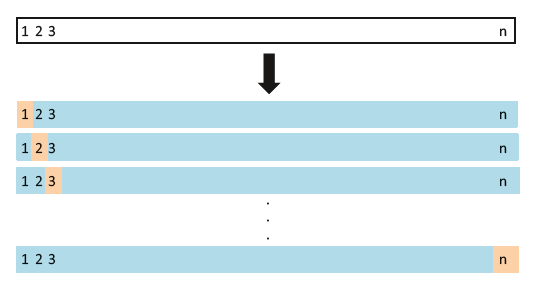

### 1-3. k-fold 교차검증

- 관측치셋을 임의로 크기가 거의 같은 k개의 그룹(fold)로 분할


- 첫 번째 fold는 검증셋으로 취급하고 적합은 나머지 k-1개 fold에 대해 수행


- 이 절차를 k번 반복한다.


- LOOCV는 k를 n과 동일하게 설정한 k-fold CV의 특별한 경우이다.


- 현실에서 k-fold CV는 **보통 k=5 또는 k=10을 사용**한다.


- n이 매우 큰 경우 계산량 때문에 LOOCV가 효율성이 떨어진다. 따라서 k-fold를 **일반적으로 더 많이 사용**한다.


- LOOCV 보다 k-fold에서 **검정 오차율을 보통 더 정확하게 추정**한다.

    - 이는 **편향-분산 절충**과 관련이 있다.
    - LOOCV는 편향 감소 측면에서는 k-fold CV 보다 명백히 낫지만 더 큰 분산을 가지게 된다.
    - Why? LOOCV는 n개 적합된 모델의 결과를 평균하는데, 적합된 모델은 각각 거의 동일한 관측치들로 구성된 훈련셋을 사용한다.
    - 그러므로 적합된 모델의 결과들은 서로 높은 (양의) 상관성이 존재한다.
    - 반면 k-fold에서 각 모델의 훈련셋 사이에는 겹치는 부분이 적어 적합된 모델들이 서로 덜 상관되어있다.
    - 상관성이 높은 값들의 평균은 상관성이 낮은 값들의 평균보다 분산이 크기 때문에 LOOCV의 검정오차 추정치는 k-fold CV에서보다 분산이 더 큰 경향이 있다.

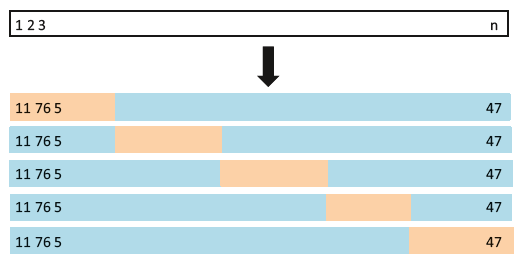

## 2. 붓스트랩(Bootstrap)

- 붓스트랩은 추정량 또는 통계학습방법과 연관된 불확실성을 수량화하는데 쓰이는 통계적 도구


- 간단하게는 선형회귀 적합에서 계수의 표준오차를 추정하는데 사용


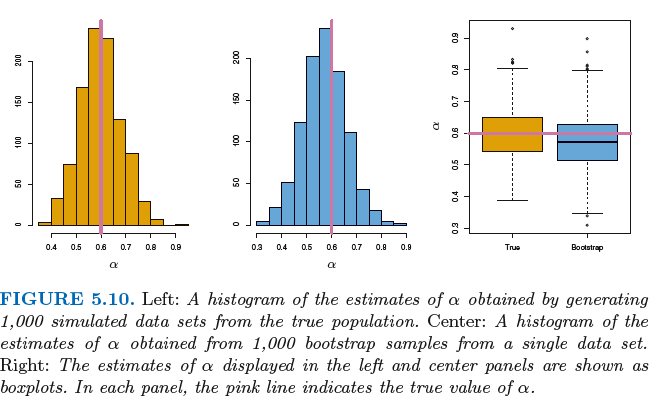

- 위 히스토그램과 박스플랏을 살펴보면 실제 모집단과 1,000개 붓스트랩 추정치에서 얻은 alpha 값 추정치가 서로 유사한 것을 알 수 있다.

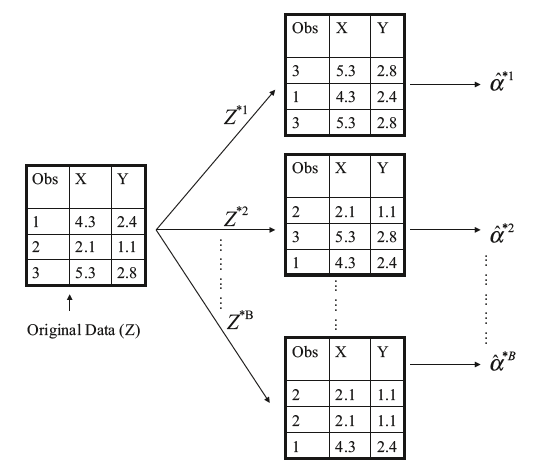

- 붓스트랩 기법을 n=3 개의 관측치를 포함하는 작은 표본에 적용한 그림

- 각 붓스트랩 데이터셋은 원래의 데이터셋으로부터 복원방식으로 추출된 n개의 관측치를 포함한다.

- 각 붓스트랩 데이터셋은 alpha의 추정치를 얻는 데 사용된다.

## 실습

### 1. 검증셋 기법

In [2]:
install.packages("ISLR")
library(ISLR)

package 'ISLR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\student\AppData\Local\Temp\RtmpSclKjR\downloaded_packages


In [3]:
set.seed(1)
train = sample(392, 196) # 392개 관측치 중 랜덤으로 196개를 선택해 관측치 셋을 크기가 같은 두 부분으로 분할

In [4]:
lm.fit = lm(mpg~horsepower, data=Auto, subset=train) # 훈련셋의 관측치에만 선형회귀를 적합

In [5]:
attach(Auto)

In [6]:
mean((mpg-predict(lm.fit, Auto))[-train]^2) # 검증셋 내 196개 관측치의 MSE 계산

[1] 26.14142

In [7]:
lm.fit2 = lm(mpg~poly(horsepower,2), data=Auto, subset=train) # 이차다항회귀
mean((mpg-predict(lm.fit2, Auto))[-train]^2) # 검증셋 내 196개 관측치의 MSE 계산

[1] 19.82259

In [8]:
lm.fit3 = lm(mpg~poly(horsepower,3), data=Auto, subset=train) # 삼차다항회귀
mean((mpg-predict(lm.fit3, Auto))[-train]^2) # 검증셋 내 196개 관측치의 MSE 계산

[1] 19.78252

In [9]:
set.seed(2)
train = sample(392, 196)
lm.fit = lm(mpg~horsepower, data=Auto, subset=train) 
mean((mpg-predict(lm.fit, Auto))[-train]^2) #다른 훈련셋을 선택하면 다른 오차가 얻어진다.

[1] 23.29559

### 2. LOOCV

In [10]:
glm.fit= glm(mpg~horsepower, data=Auto)
coef(glm.fit)

(Intercept)  horsepower 
 39.9358610  -0.1578447

In [11]:
library(boot)

In [12]:
glm.fit = glm(mpg~horsepower, data=Auto)
cv.err = cv.glm(Auto, glm.fit)
cv.err$delta # 교차검증에 대한 결과

[1] 24.23151 24.23114

In [13]:
cv.error = rep(0,5) # i= 1 부터 5까지에 다항식에 대한 다항식회귀적합을 반복 수행 및 교차 검증 오차 계산
for (i in 1:5) {
    glm.fit = glm(mpg~poly(horsepower, i ), data = Auto)
    cv.error[i] = cv.glm(Auto, glm.fit)$delta[1]
}
cv.error # 검정MSE는 선형적합에서 이차적합으로 가면서 크게 줄어들지만 그 이후에는 개선이 뚜렷하지 않다.

[1] 24.23151 19.24821 19.33498 19.42443 19.03321

### 3. k-fold 교차검증

In [14]:
set.seed(17)
cv.error.10 = rep(0, 10)
for (i in 1:10) {
    glm.fit = glm(mpg ~ poly(horsepower, i ), data= Auto)
    cv.error.10[i] = cv.glm(Auto, glm.fit, K=10)$delta[1]
}
cv.error.10

[1] 24.20520 19.18924 19.30662 19.33799 18.87911 19.02103 18.89609 19.71201
 [9] 18.95140 19.50196

### 4. 붓스트랩

(1) 관심있는 통계량을 계산하는 함수 생성

(2) boot 라이브러리에 포함된 boot() 함수를 사용해 자료로부터 관측치를 반복적으로 복원추출함으로써 붓스트랩 수행

In [17]:
alpha.fn = function(data, index){
    X=data$X[index]
    Y=data$Y[index]
    return((var(Y)-cov(X,Y))/(var(X)+var(Y)-2*cov(X,Y)))
} # 선택된 관측치들을 기반으로 alpha에 대한 추정치를 출력하는 함수

In [18]:
alpha.fn(Portfolio, 1:100) # 100개의 관측치를 사용하여 alpha를 추정

[1] 0.5758321

In [19]:
set.seed(1)
alpha.fn(Portfolio, sample(100,100,replace=T)) # 1에서 100까지 범위의 100개 관측치를 랜덤으로 복원 추출

[1] 0.5963833

In [20]:
boot(Portfolio, alpha.fn, R=1000) # alpha에 대한 R=1000개의 붓스트랩 추정치 제공


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = Portfolio, statistic = alpha.fn, R = 1000)


Bootstrap Statistics :
     original        bias    std. error
t1* 0.5758321 -7.315422e-05  0.08861826

---

## 참고 문헌

- An Introduction to Statistical Learning (with Applications in R)
- http://blog.naver.com/PostView.nhn?blogId=santalsm&logNo=220859539666
- https://niceguy1575.tistory.com/45